In [1]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score

In [6]:
import os
os.getcwd()

'/home/lih/research_code'

In [2]:
data = pd.read_csv(r"/home/lih/research_code/train.csv")

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [10]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


Data preprocessing

In [3]:
# feature select
data.drop(["Cabin","Name","Ticket"],inplace=True,axis=1) # inplace  = T, cover previous table
data.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,male,22.0,1,0,7.2500,S
1,2,1,1,female,38.0,1,0,71.2833,C
2,3,1,3,female,26.0,0,0,7.9250,S
3,4,1,1,female,35.0,1,0,53.1000,S
4,5,0,3,male,35.0,0,0,8.0500,S


In [4]:
# missing data
data["Age"] = data["Age"].fillna(data["Age"].mean())

In [5]:
data = data.dropna() # remove all NA/missing value

In [6]:
labels = data["Embarked"].unique().tolist()
data["Embarked"] = data["Embarked"].apply(lambda x: labels.index(x))

In [24]:
labels.index("S")

0

In [23]:
data

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,male,22.000000,1,0,7.2500,0
1,2,1,1,female,38.000000,1,0,71.2833,1
2,3,1,3,female,26.000000,0,0,7.9250,0
3,4,1,1,female,35.000000,1,0,53.1000,0
4,5,0,3,male,35.000000,0,0,8.0500,0
...,...,...,...,...,...,...,...,...,...
886,887,0,2,male,27.000000,0,0,13.0000,0
887,888,1,1,female,19.000000,0,0,30.0000,0
888,889,0,3,female,29.699118,1,2,23.4500,0
889,890,1,1,male,26.000000,0,0,30.0000,1


In [7]:
data["Sex"] = (data["Sex"]=="male").astype("int")

In [8]:
data.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,1,22.0,1,0,7.2500,0
1,2,1,1,0,38.0,1,0,71.2833,1
2,3,1,3,0,26.0,0,0,7.9250,0
3,4,1,1,0,35.0,1,0,53.1000,0
4,5,0,3,1,35.0,0,0,8.0500,0


Move on to Model

In [9]:
x = data.iloc[:,data.columns !="Survived"]

In [10]:
y = data.iloc[:,data.columns=="Survived"]

In [11]:
from sklearn.model_selection import train_test_split
Xtrain, Xtest, Ytrain, Ytest = train_test_split(x,y,test_size=0.3)

In [12]:
# rearange the index for further uses
for i in [Xtrain, Xtest, Ytrain, Ytest]:
    i.index = range(i.shape[0])

In [13]:
clf = DecisionTreeClassifier(random_state=10)
clf = clf.fit(Xtrain, Ytrain)
score = clf.score(Xtest,Ytest)
score

0.7790262172284644

In [14]:
## first check with cross validation
clf = DecisionTreeClassifier(random_state=10)
score = cross_val_score(clf,x,y,cv=10).mean()
score

0.7514683350357507

0.8166624106230849


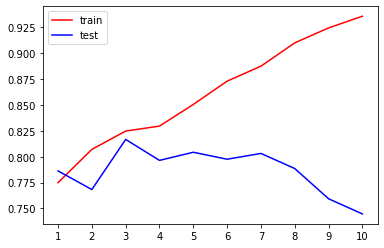

In [15]:
tr = []
te = []
for i in range(10):
    clf = DecisionTreeClassifier(random_state=10
                                ,max_depth=i+1
                                ,criterion="entropy"
                                )
    clf = clf.fit(Xtrain, Ytrain)
    score_tr = clf.score(Xtrain,Ytrain)
    score_te = cross_val_score(clf,x,y,cv=10).mean()
    tr.append(score_tr)
    te.append(score_te)
print(max(te))
plt.plot(range(1,11),tr,color="red",label="train")
plt.plot(range(1,11),te,color="blue",label="test")
plt.xticks(range(1,11))
plt.legend()
plt.show()

In [16]:
# grid search : changing multiple parameters
import numpy as np
gini_thresholds = np.linspace(0,0.5,20)
# entropy_thresholds = np.linspace(0,1,50)

parameters = {"criterion":("gini","entropy")
             ,"splitter": ("random","best")
             ,"max_depth":[*range(1,10)]
             ,"min_samples_leaf":[*range(1,50,5)]
             ,"min_impurity_decrease": [*np.linspace(0,0.5,20)]
    
}
clf = DecisionTreeClassifier(random_state=10)
GS = GridSearchCV(clf,parameters,cv=10)
GS = GS.fit(Xtrain,Ytrain)

In [17]:
GS.best_params_ # the best combination

{'criterion': 'entropy',
 'max_depth': 6,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 11,
 'splitter': 'best'}

In [18]:
GS.best_score_

0.8247311827956988